# 1 Minute Chart Bitcoin Trading Stratgy Data Analysis

Let's import all necessary **libraries** and read the **data**!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('btc_strategy_demo.csv')
df

,Day,Result,Benefit,Commission,Total
0,1,0.0000,0.00,0.00,10000.00
1,1,0.0047,47.00,0.04,10046.96
2,1,0.0031,31.15,0.02,10078.09
3,1,-0.0011,-11.09,0.01,10066.99
4,2,0.0022,22.15,0.02,10089.12
...,...,...,...,...,...
119,27,0.0088,97.38,0.07,11163.73
120,27,0.0088,98.24,0.07,11261.90
121,28,0.0088,99.10,0.07,11360.93
122,29,0.0041,46.58,0.03,11407.47


Is the data format adequate? I used Pandas .dtypes to know what type of data is in the csv file.

In [2]:
df.dtypes

Day             int64
Result        float64
Benefit       float64
Commission    float64
Total         float64
dtype: object

There is no need to have the **first row** on the data set, since it doesn'r represent a trade itself and would distort the averages and further calculations. I use Panda's .iloc in order to drop rows.

In [3]:
df = df.iloc[1:]
df.head()

,Day,Result,Benefit,Commission,Total
1,1,0.0047,47.00,0.04,10046.96
2,1,0.0031,31.15,0.02,10078.09
3,1,-0.0011,-11.09,0.01,10066.99
4,2,0.0022,22.15,0.02,10089.12
5,2,0.0026,26.23,0.02,10115.34


## Plot 1 
**Portfolio Value Over 30 Days in Euros**

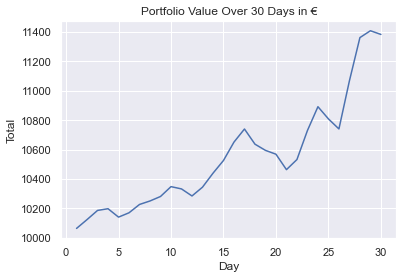

In [4]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="Day", y="Total", data=df, ci=None).set(title='Portfolio Value Over 30 Days in €')
plt.savefig("value_evolution.png",format='png',dpi=300)

## Plot 2
**Percentaje of Wins and Loses in Positions taken**
First I need to calculate how many positions generated profit (.gt(0)  --> greater than Zero) and how many generted loses (.lt(0) --> lower than Zero). A data frame is created in order to plot it.

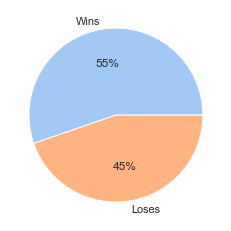

In [5]:
positive = df['Result'].gt(0).sum()
negative = df['Result'].lt(0).sum()
data = [positive,negative]

labels = ["Wins","Loses"]
colors = sns.color_palette('pastel')[0:2]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.savefig("wins_loses.png",format='png',dpi=300)
plt.show()

In order to create the next plot, a **new data frame** is created where we can observe in one column the **average benefit each day** and another colum where the **total average benefit** is showed.

In [6]:
final = []
for day in range (1,31):
    df_new =df[df['Day'] == day]
    df_new['Avg_Benefit_Day'] = df_new['Benefit'].mean()
    final.append(df_new)
    
final_df = pd.concat(final, ignore_index=True)

avg_benf_df = final_df[['Day','Avg_Benefit_Day']].drop_duplicates()
avg_benf_df['Avg_Total'] = avg_benf_df['Avg_Benefit_Day'].mean()
avg_benf_df['Zero_Line'] = 0
avg_benf_df.head()

/var/folders/xc/p1vn9pj537x8bjlw0zlhgh0r0000gn/T/ipykernel_89019/1994231351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Avg_Benefit_Day'] = df_new['Benefit'].mean()


,Day,Avg_Benefit_Day,Avg_Total,Zero_Line
0,1,22.353333,13.368048,0
3,2,13.930000,13.368048,0
9,3,6.614000,13.368048,0
14,4,2.208000,13.368048,0
24,5,-8.081250,13.368048,0


## Plot 3
**Average Benefits Obtained each Day & Total Average in €**

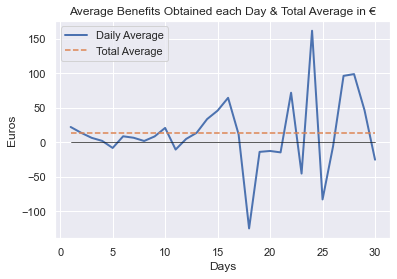

In [7]:
fig = plt.figure
ax1 = plt.subplot(111)
plt.title("Average Benefits Obtained each Day & Total Average in €")
ax1.plot(avg_benf_df.Day, avg_benf_df.Avg_Benefit_Day, linewidth=2, label='Daily Average')
ax1.plot(avg_benf_df.Day, avg_benf_df.Avg_Total, '--', label='Total Average')
plt.xlabel("Days")
plt.ylabel("Euros")
plt.legend(loc='best')
ax1.plot(avg_benf_df.Day, avg_benf_df.Zero_Line, color='k', linewidth=0.7)
plt.savefig("average_graph.png",format='png',dpi=300)
plt.show()

Final calculations for the **Return Of Investment** over the 30 days, a posible **Annual Percentage Yield** and the **average number of positions** taken every day.

In [8]:
final = df.at[123,'Total']
roi = (((final)-10000)*100)/10000
roi

13.823600000000006

In [9]:
apy = (roi*365)/30
apy

168.1871333333334

In [10]:
day_count = df.pivot_table(columns=['Day'], aggfunc='size')
day_count = day_count.reset_index()
day_count[0].mean()

4.1